# Imports
Dask is a module used for processing large datasets using a pandas-like interface. It works lazily, building a computation graph and only executes the actions when dataframe.compute() is called. It returns a pandas dataframe after that.<br>
The Client() is just for monitoring these actions

In [21]:
import pandas as pd

In [24]:
import dask.dataframe as dd
from dask.distributed import Client

client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 16,Total memory: 15.35 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:63564,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 15.35 GiB
Comm: tcp://127.0.0.1:63596,Total threads: 4
Dashboard: http://127.0.0.1:63598/status,Memory: 3.84 GiB
Nanny: tcp://127.0.0.1:63570,


# Stuff
The rest of this notebook is just me experimenting around with the data and building suitable datasets that can be used in the training notebook.

In [23]:
anime_list = pd.read_csv("AnimeList.csv")
anime_list

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14473,26089,Gutchonpa Omoshiro Hanashi,NaN,グッチョンパおもしろ話,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Unknown,5,Finished Airing,...,NaN,Fall 1987,Unknown,"{'Other': [{'mal_id': 26087, 'type': 'anime', ...",NaN,NaN,NaN,Kids,[],[]
14474,21525,Geba Geba Shou Time!,NaN,ゲバゲバ笑タイム!,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,1,Finished Airing,...,NaN,NaN,NaN,[],Studio Lotus,NaN,NaN,Comedy,[],[]
14475,37897,Godzilla: Hoshi wo Kuu Mono,NaN,GODZILLA -星を喰う者-,"Godzilla Part 3, Godzilla: Eater of Stars",https://myanimelist.cdn-dena.com/images/anime/...,Movie,Other,1,Not yet aired,...,NaN,NaN,NaN,"{'Prequel': [{'mal_id': 36816, 'type': 'anime'...",NaN,NaN,NaN,"Action, Sci-Fi, Adventure, Fantasy",[],[]
14476,34193,Nippon Mukashibanashi: Sannen Netarou,NaN,日本昔ばなし 三ねん寝太郎,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Other,1,Finished Airing,...,NaN,NaN,NaN,[],NaN,NaN,NaN,"Fantasy, Kids",[],[]


In [25]:
user_anime_list = dd.read_csv("UserAnimeList.csv")
user_anime_list

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
npartitions=79,,,,,,,,,,,
,object,int64,int64,object,object,int64,int64,float64,int64,int64,float64
,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...


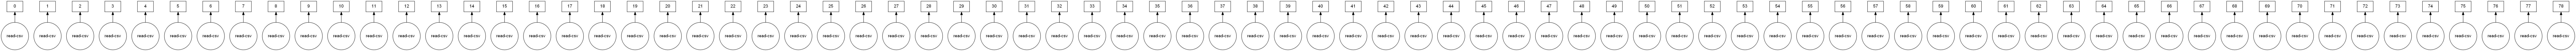

In [26]:
user_anime_list.visualize()

In [27]:
cols = ["username", "anime_id", "my_watched_episodes", "my_score", "my_status"]
%time ratings = dd.read_csv('UserAnimeList.csv', engine='python', usecols = cols, encoding='utf8', assume_missing=True, on_bad_lines='skip', dtype={'username': 'string', 'anime_id': 'int', 'my_watched_episodes': 'int', 'my_score': 'int', 'my_status': 'int'})

Wall time: 20.5 ms


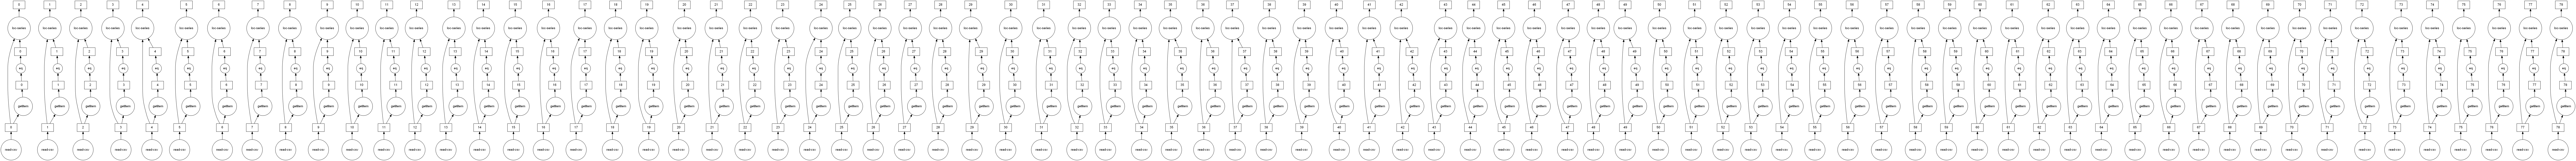

In [28]:
watched_ratings = ratings.loc[ratings['my_status'] == 2]
watched_ratings.visualize()

In [29]:
ratings = dd.read_csv("WatchedRatingList/**.part", encoding = "ISO-8859-1", on_bad_lines='skip', dtype={'anime_id': 'object', 'my_score': 'object', 'user_id': 'object'})[['user_id', 'anime_id', 'my_score']]
ratings

,user_id,anime_id,my_score
npartitions=79,,,
,object,object,object
,...,...,...
...,...,...,...
,...,...,...
,...,...,...


In [30]:
ratings = ratings.dropna(subset=['anime_id', 'user_id', 'my_score'])
ratings['anime_id'] = ratings['anime_id'].astype(int)
ratings['user_id'] = ratings['user_id'].astype(int)
ratings['my_score'] = ratings['my_score'].astype(int)

ratings = ratings.loc[ratings['my_score']!=0]

In [31]:
a5000 = ratings['anime_id'].value_counts().head(5000)
a5000

1535     148568
1575     117752
16498    117568
11757    116698
6547     112546
          ...  
32881       717
1116        717
2753        716
2799        716
3005        716
Name: anime_id, Length: 5000, dtype: int64

In [32]:
a5000 = a5000.reset_index()
a5000.columns = ['anime_id', 'count']
a5000

,anime_id,count
0,1535,148568
1,1575,117752
2,16498,117568
3,11757,116698
4,6547,112546
...,...,...
4995,32881,717
4996,1116,717
4997,2753,716
4998,2799,716


In [33]:
a5000uALL = ratings.loc[ratings['anime_id'].isin(a5000['anime_id'])].compute()

In [34]:
a5000uALL

,user_id,anime_id,my_score
0,2255153,59,7
1,2255153,74,7
2,2255153,120,7
3,2255153,178,7
4,2255153,210,7
...,...,...,...
47487,236339,1230,10
47488,236339,1807,6
47489,236339,1827,8
47490,236339,3655,9


In [35]:
a5000uALL['user_id'].value_counts()

2063865    4639
291713     4470
8669       4463
1245229    4247
441467     4174
           ... 
328913        1
100543        1
515035        1
1545929       1
2512049       1
Name: user_id, Length: 266996, dtype: int64

In [36]:
user_list = pd.read_csv("UserList.csv")
user_list.loc[user_list['user_id']==2063865]

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
177435,De_Baer,2063865,120,8789,0,0,0,1159.57,Male,Good Old Germany,1982-10-27,NaN,2013-01-20,2018-05-23 07:10:49,4.74,8.0,76573.0


In [37]:
uALL = a5000uALL['user_id'].value_counts().reset_index()
uALL.columns = ['user_id', 'count']
uALL

,user_id,count
0,2063865,4639
1,291713,4470
2,8669,4463
3,1245229,4247
4,441467,4174
...,...,...
266991,328913,1
266992,100543,1
266993,515035,1
266994,1545929,1


In [38]:
uALL.loc[uALL['count']>=100]

,user_id,count
0,2063865,4639
1,291713,4470
2,8669,4463
3,1245229,4247
4,441467,4174
...,...,...
125093,522163,100
125094,427318,100
125095,3676417,100
125096,2263117,100


In [39]:
u100k = uALL.loc[uALL['count'] >= 50].sample(100000)
u100k = u100k.sort_values(by='count', ascending=False)
u100k

,user_id,count
4,441467,4174
5,6011354,4153
6,66680,3961
11,812301,3612
14,4962337,3346
...,...,...
174207,228496,50
174293,128986,50
175160,153842,50
174789,168834,50


In [40]:
a5000u100k = a5000uALL.loc[a5000uALL['user_id'].isin(u100k['user_id'])]
a5000u100k

,user_id,anime_id,my_score
49,1897606,1,8
50,1897606,19,9
51,1897606,20,9
52,1897606,26,6
53,1897606,30,8
...,...,...,...
47476,1289601,10321,10
47477,1289601,10589,10
47478,1289601,11123,10
47480,1289601,12291,9


In [41]:
a5000u100k['my_score'].describe()

count    2.239489e+07
mean     7.588968e+00
std      1.650697e+00
min      1.000000e+00
25%      7.000000e+00
50%      8.000000e+00
75%      9.000000e+00
max      1.000000e+01
Name: my_score, dtype: float64

In [42]:
aid_mapping = pd.Series(a5000u100k['anime_id'].unique()).reset_index()
aid_mapping.columns = ['aid', 'anime_id']
aid_mapping

,aid,anime_id
0,0,1
1,1,19
2,2,20
3,3,26
4,4,30
...,...,...
4995,4995,3636
4996,4996,31886
4997,4997,16189
4998,4998,28309


In [43]:
uid_mapping = pd.Series(a5000u100k['user_id'].unique()).reset_index()
uid_mapping.columns = ['uid', 'user_id']
uid_mapping

,uid,user_id
0,0,1897606
1,1,2347781
2,2,5015094
3,3,102436
4,4,28328
...,...,...
99995,99995,3495411
99996,99996,1419867
99997,99997,4273353
99998,99998,3975907


In [44]:
normalized = pd.merge(pd.merge(a5000u100k, uid_mapping, on='user_id'), aid_mapping, on='anime_id')[['uid', 'aid', 'my_score']]
normalized

,uid,aid,my_score
0,0,0,8
1,4,0,9
2,5,0,7
3,7,0,8
4,10,0,2
...,...,...,...
22394881,99256,4999,9
22394882,99284,4999,10
22394883,99291,4999,10
22394884,99578,4999,9


In [45]:
normalized.to_csv("a5000u100k/ratings.csv", index=False)
aid_mapping.to_csv("a5000u100k/aid_mapping.csv", index=False)
uid_mapping.to_csv("a5000u100k/uid_mapping.csv", index=False)

In [46]:
normalized = pd.read_csv("a5000u100k/ratings.csv")
normalized

,uid,aid,my_score
0,0,0,8
1,4,0,9
2,5,0,7
3,7,0,8
4,10,0,2
...,...,...,...
22394881,99256,4999,9
22394882,99284,4999,10
22394883,99291,4999,10
22394884,99578,4999,9


In [47]:
u10k = uALL.loc[uALL['count'] >= 50].sample(10000)
u10k = u10k.sort_values(by='count', ascending=False)
u10k

,user_id,count
11,812301,3612
45,1953280,2781
91,74171,2349
93,1144235,2345
98,1223545,2311
...,...,...
174993,70280,50
174577,128338,50
174284,104778,50
174112,5378993,50


In [48]:
a5000u10k = a5000uALL.loc[a5000uALL['user_id'].isin(u10k['user_id'])]
a5000u10k

,user_id,anime_id,my_score
10108,5844149,30,10
10109,5844149,199,8
10110,5844149,226,8
10111,5844149,356,7
10112,5844149,357,7
...,...,...,...
47476,1289601,10321,10
47477,1289601,10589,10
47478,1289601,11123,10
47480,1289601,12291,9


In [49]:
aid_mapping_10k = pd.Series(a5000u10k['anime_id'].unique()).reset_index()
aid_mapping_10k.columns = ['aid', 'anime_id']
aid_mapping_10k

,aid,anime_id
0,0,30
1,1,199
2,2,226
3,3,356
4,4,357
...,...,...
4995,4995,34792
4996,4996,34204
4997,4997,15719
4998,4998,10106


In [50]:
uid_mapping_10k = pd.Series(a5000u10k['user_id'].unique()).reset_index()
uid_mapping_10k.columns = ['uid', 'user_id']
uid_mapping_10k

,uid,user_id
0,0,5844149
1,1,158248
2,2,109443
3,3,1089229
4,4,37325
...,...,...
9995,9995,1485031
9996,9996,1200343
9997,9997,151630
9998,9998,5549850


In [51]:
normalized_10k = pd.merge(pd.merge(a5000u10k, uid_mapping_10k, on='user_id'), aid_mapping_10k, on='anime_id')[['uid', 'aid', 'my_score']]
normalized_10k

,uid,aid,my_score
0,0,0,10
1,1,0,8
2,2,0,7
3,8,0,8
4,9,0,9
...,...,...,...
2201030,8881,4999,7
2201031,9123,4999,5
2201032,9227,4999,6
2201033,9549,4999,8


In [52]:
normalized_10k.to_csv("a5000u10k/ratings.csv", index=False)
aid_mapping_10k.to_csv("a5000u10k/aid_mapping.csv", index=False)
uid_mapping_10k.to_csv("a5000u10k/uid_mapping.csv", index=False)

In [2]:
normalized_10k = pd.read_csv("a5000u10k/ratings.csv")
normalized_10k

,uid,aid,my_score
0,0,0,9
1,1,0,9
2,3,0,9
3,7,0,10
4,8,0,10
...,...,...,...
2241553,9035,4999,7
2241554,9137,4999,7
2241555,9402,4999,7
2241556,9409,4999,7


In [3]:
anime_list = pd.read_csv("AnimeList.csv")

In [5]:
anime_list.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme'],
      dtype='object')

In [12]:
aid_mapping_10k = pd.read_csv("a5000u10k/aid_mapping.csv")
aid_mapping_10k

,aid,anime_id
0,0,1
1,1,68
2,2,76
3,3,77
4,4,98
...,...,...
4995,4995,163
4996,4996,29808
4997,4997,37078
4998,4998,12623


In [21]:
with_av = pd.merge(aid_mapping_10k, anime_list[['anime_id', 'score']], on='anime_id')[['aid', 'score']]
with_av.to_csv("a5000u10k/anime_av.csv", index=False)

In [22]:
with_av

,aid,score
0,0,8.81
1,1,7.49
2,2,7.49
3,3,8.07
4,4,7.55
...,...,...
4995,4995,6.54
4996,4996,7.23
4997,4997,8.36
4998,4998,7.16


In [9]:
anime_list.loc[anime_list['score']==0]

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
55,33185,Peace Maker Kurogane Movie 1: Omou Michi,NaN,PEACE MAKER 鐵 前編～想道〈オモウミチ〉～,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Manga,1,Not yet aired,...,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 473, 'type': 'manga...",NaN,NaN,White Fox,"Action, Comedy, Historical, Samurai, Shounen",[],"['""Rust"" by THE JETZEJOHNSON (ジェッジジョンソン)']"
76,37447,Karakuri Circus,Le Cirque de Karakuri,からくりサーカス,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,36,Not yet aired,...,NaN,NaN,Unknown,"{'Adaptation': [{'mal_id': 868, 'type': 'manga...","Shogakukan, Twin Engine",NaN,Studio VOLN,"Adventure, Mystery, Shounen",[],[]
109,36951,Yuu☆Yuu☆Hakusho Special,NaN,幽☆遊☆白書,"Yuu Yuu Hakusho, YuYu Hakusho",https://myanimelist.cdn-dena.com/images/anime/...,Special,Manga,1,Not yet aired,...,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 53, 'type': 'manga'...",Bandai Visual,NaN,Studio Pierrot,"Action, Adventure, Comedy, Demons, Supernatura...",[],[]
143,37711,Koi to Uso OVA,Love and Lies,恋と嘘,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Manga,2,Not yet aired,...,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 78065, 'type': 'man...",NaN,NaN,LIDENFILMS,"Drama, Romance, School",[],[]
145,37435,Carol & Tuesday,NaN,キャロル&チューズデイ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,0,Not yet aired,...,NaN,Spring 2019,Unknown,[],flying DOG,NaN,Bones,"Drama, Music, Romance",[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14418,35155,Kurayami wa Kiken ga Ippai,NaN,暗やみは危険がいっぱい,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,1,Finished Airing,...,NaN,NaN,NaN,[],NaN,NaN,NaN,"Drama, Kids",[],[]
14425,37886,Wo Shi Jiang Xiaobai (2018),I&#039;m Joybo OVA,我是江小白 小剧场,Wo Shi Jiang Xiao Bai: Xiao Ju Chang,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Original,1,Finished Airing,...,NaN,NaN,NaN,"{'Prequel': [{'mal_id': 36775, 'type': 'anime'...",NaN,NaN,2:10 Animation,"Slice of Life, Drama, Romance",[],[]
14442,37428,Chara to Otamajakushi Shima,NaN,キャラとおたまじゃくし島,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,0,Currently Airing,...,NaN,Spring 2018,Mondays at 10:15 (JST),[],"Dentsu, NHK",NaN,33 Collective,"Adventure, Fantasy, Kids",[],[]
14463,37787,Space Bug,NaN,スペースバグ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,0,Not yet aired,...,NaN,Summer 2018,Sundays at 10:30 (JST),[],NaN,NaN,NaN,"Adventure, Space",[],[]


In [2]:
user_list = pd.read_csv("UserList.csv")
user_list.columns

Index(['username', 'user_id', 'user_watching', 'user_completed', 'user_onhold',
       'user_dropped', 'user_plantowatch', 'user_days_spent_watching',
       'gender', 'location', 'birth_date', 'access_rank', 'join_date',
       'last_online', 'stats_mean_score', 'stats_rewatched', 'stats_episodes'],
      dtype='object')

In [37]:
user_id = user_list.loc[user_list['username']=='karthiga']['user_id']
list(user_id)

[2255153]

In [35]:
user_list.loc[user_list['user_id']==4266]

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
133,Kaolla,4266,3,92,2,10,5,58.27,Male,"Sherwood, Oregon",1994-09-11,NaN,2007-05-14,1900-04-01 22:51:00,7.88,65.0,3453.0


In [34]:
uidm = pd.read_csv("a5000u10k/uid_mapping.csv")
uidm

,uid,user_id
0,0,1537661
1,1,212332
2,2,57779
3,3,21970
4,4,4266
...,...,...
9995,9995,167136
9996,9996,6044713
9997,9997,4538045
9998,9998,1226719


In [52]:
aidm = pd.read_csv("a5000u10k/aid_mapping.csv")
aidm

,aid,anime_id
0,0,1
1,1,68
2,2,76
3,3,77
4,4,98
...,...,...
4995,4995,163
4996,4996,29808
4997,4997,37078
4998,4998,12623


In [38]:
from jikanpy import Jikan

In [39]:
jikan = Jikan()

In [45]:
response = jikan.user(username='Green_Fish', request='animelist')['anime']

In [46]:
response

[{'mal_id': 34572,
  'title': 'Black Clover',
  'video_url': 'https://myanimelist.net/anime/34572/Black_Clover/video',
  'url': 'https://myanimelist.net/anime/34572/Black_Clover',
  'image_url': 'https://cdn.myanimelist.net/images/anime/2/88336.jpg?s=fe950e4ce27448bbdcd25353f68283ab',
  'type': 'TV',
  'watching_status': 1,
  'score': 0,
  'watched_episodes': 2,
  'total_episodes': 170,
  'airing_status': 2,
  'season_name': None,
  'season_year': None,
  'has_episode_video': True,
  'has_promo_video': True,
  'has_video': True,
  'is_rewatching': False,
  'tags': None,
  'rating': 'PG-13',
  'start_date': '2017-10-03T00:00:00+00:00',
  'end_date': '2021-03-30T00:00:00+00:00',
  'watch_start_date': None,
  'watch_end_date': None,
  'days': None,
  'storage': None,
  'priority': 'Low',
  'added_to_list': False,
  'studios': [{'mal_id': 1,
    'type': 'anime',
    'name': 'Studio Pierrot',
    'url': 'https://myanimelist.net/anime/producer/1/Studio_Pierrot'}],
  'licensors': [{'mal_id': 

In [48]:
prefs = []

In [49]:
for anime in response:
    if anime['watching_status'] == 2 and anime['score'] != 0:
        prefs.append({'anime_id': anime['mal_id'], 'my_score': anime['score']})

In [51]:
prefs = pd.DataFrame(prefs)
prefs

,anime_id,my_score
0,22199,6
1,22729,7
2,27655,6
3,6547,9
4,11111,7
...,...,...
132,23847,10
133,33161,9
134,37779,8
135,35507,8


In [55]:
prefs.loc[prefs['anime_id'].isin(aidm['anime_id'])]

,anime_id,my_score
0,22199,6
1,22729,7
2,27655,6
3,6547,9
4,11111,7
...,...,...
131,18753,8
132,23847,10
133,33161,9
135,35507,8


In [3]:
user_list

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.31,Female,"Chennai, India",1990-04-29,NaN,2013-03-03,2014-02-04 01:32:00,7.43,0.0,3391.0
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,Female,Manila,1995-01-01,NaN,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0
2,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13,1900-03-24 12:48:00,6.15,6.0,4936.0
3,bskai,228342,25,414,2,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,NaN,2009-08-31,2014-05-12 16:35:00,8.27,1.0,10081.0
4,shuzzable,2347781,36,72,16,2,25,35.48,NaN,NaN,NaN,NaN,2013-03-25,2015-09-09 21:54:00,9.06,7.0,2154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302670,ScruffyPuffy,3119025,0,27,0,0,0,7.92,NaN,NaN,NaN,NaN,2013-09-06,2014-10-10 09:04:00,0.00,0.0,477.0
302671,Torasori,3975907,22,239,0,4,176,86.88,Male,"Latvia, Riga",1998-11-18,NaN,2014-07-30,2018-05-24 21:34:46,8.98,47.0,5313.0
302672,onpc,1268417,5,169,2,5,24,38.36,Male,NaN,NaN,NaN,2012-04-23,2016-12-28 14:35:00,7.72,0.0,2280.0
302673,HMicca,1289601,11,73,2,2,16,119.97,Female,"Birmingham, England",1995-08-12,NaN,2012-05-05,2012-11-15 08:10:00,8.89,11.0,7049.0


In [14]:
user_list.loc[user_list["username"]=='Green_Fh'][['username', 'user_id']]['user_id'].empty

True

In [8]:
user_list.loc[len(user_list)] = {"username": 'Green_Fish', "user_id": 8782001}

In [9]:
user_list.loc[user_list["username"]=='Green_Fish'][['username', 'user_id']]

,username,user_id
302675,Green_Fish,8782001


In [54]:
user_list[['username', 'user_id']].to_csv("ul.csv", index=False)

In [55]:
uidm = pd.read_csv("a5000u10k/uid_mapping - Copy.csv")
uidm

,uid,user_id
0,0,5844149
1,1,158248
2,2,109443
3,3,1089229
4,4,37325
...,...,...
9996,9996,1200343
9997,9997,151630
9998,9998,5549850
9999,9999,1289601


In [59]:
uidm.loc[uidm['user_id']==8782001]

,uid,user_id
